# Driving Behavior Data Exploratory Data Analysis

## Import Necessary Libraries

In [1]:
## Import necessary libraries
from urllib.parse import quote

## Import necessary API
import sys
sys.path.append('../../../../')
from api.v2.util.data_load import data_load
from api.v2.util.get_tag_name import show_column
from api.v2.eda.Data_Info import Data_Info
from api.v2.eda.Statistical_test import adf_test, kpss_test, pp_test, ljung_box_test, arch_test, vif_test
from api.v2.eda.Visualize_EDA import Visualize_EDA

## Set Driving Behavior Data Base Parameter

In [2]:
# Set Driving Behavior Data Base Parameter

# Set MachBase Neo URL address
URL = 'http://127.0.0.1:5654'
# Set Tag Table Name
table = 'driving_behavior'
# Set TimeFormat - > 'default' or '2006-01-02 15:04:05.000000'(Divided down to the nanosecond)
timeformat = '2006-01-02 15:04:05.000000'
# Set resample Option -> D(day), H(hour), T(minute), S(second)
resample_freq = None

## Check Driving Behavior Data Info

In [3]:
# Print Driving Behavior DataInfo
Data_Info(URL, table, timeformat, resample_freq)

Tag List: ['AccX', 'AccY', 'AccZ', 'Class', 'GyroX', 'GyroY', 'GyroZ']
--------------------------------------------
Number of data: 6728
--------------------------------------------
Start Time: 2025-07-18 00:00:00
End Time: 2025-07-18 01:52:07
--------------------------------------------
Missing Values: 0
--------------------------------------------
Smallest time interval: 1.00 seconds
Largest time interval: 1.00 seconds
--------------------------------------------
Maximum sampling rate (per second): 1.0 Hz
--------------------------------------------


## Set Driving Behavior Data Extra Parmeter
* Set based on the information confirmed in the previous step

In [4]:
# Set the desired tag names
tags = show_column(URL, table)
# Wrap each item in the list with single quotes and separate with commas
tags_ = ",".join(f"'{tag}'" for tag in tags)
# Set Tag Name
name = quote(tags_, safe=":/")
# Set Start time
start_time = '2025-07-18 00:00:00'
# Set End time 
end_time = '2025-07-18 01:52:07'
# Set TimeFormat - > 'default' or quote('2006-01-02 15:04:05.000000')(Divided down to the nanosecond)
timeformat = 'default'

In [5]:
# Driving Behavior Data Load
df = data_load(URL, table, name, start_time, end_time, timeformat, resample_freq)

In [6]:
df

NAME,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ
TIME,,,,,,,
2025-07-18 00:00:00,0.000000,0.000000,0.000000,0.0,0.059407,-0.174707,0.101938
2025-07-18 00:00:01,-1.624864,-1.082492,-0.204183,0.0,-0.028558,0.051313,0.135536
2025-07-18 00:00:02,-0.594660,-0.122410,0.220502,0.0,-0.019395,-0.029322,0.087888
2025-07-18 00:00:03,0.738478,-0.228456,0.667732,0.0,0.069791,-0.029932,0.054902
2025-07-18 00:00:04,0.101741,0.777568,-0.066730,0.0,0.030696,-0.003665,0.054902
...,...,...,...,...,...,...,...
2025-07-18 01:52:03,-0.713858,-0.652975,-0.164015,1.0,-0.147829,-1.309466,0.517250
2025-07-18 01:52:04,1.514261,0.330070,1.020714,1.0,1.321302,1.707598,-0.674548
2025-07-18 01:52:05,1.280216,-1.735172,-2.332695,1.0,0.583376,0.690507,-0.468075


## Check Visualize_EDA

Start Visualize All Method
Removed NaN Columns: set()


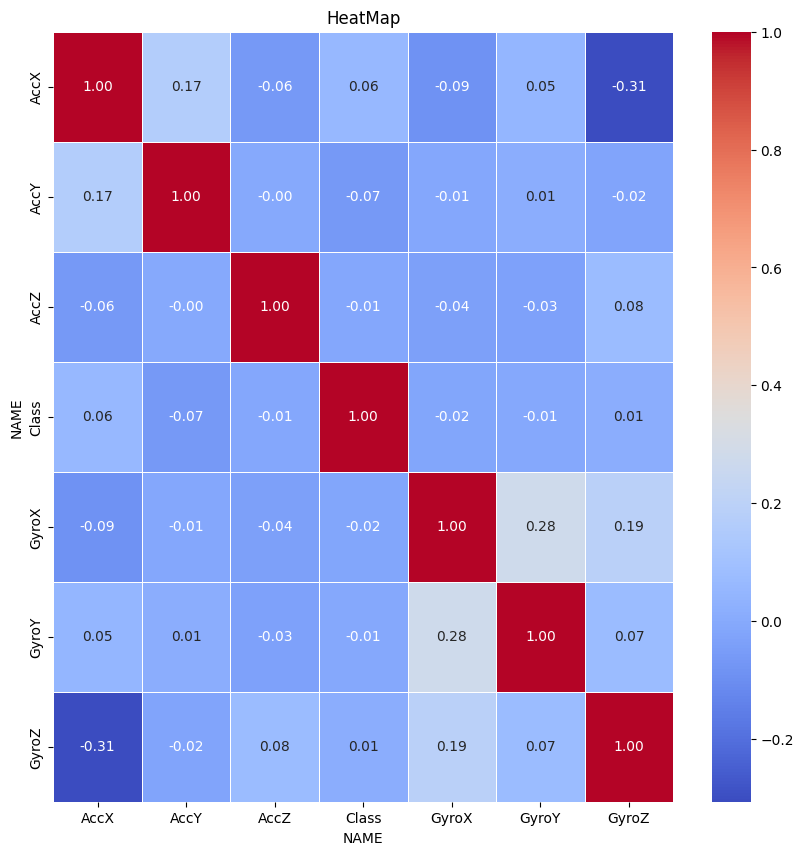

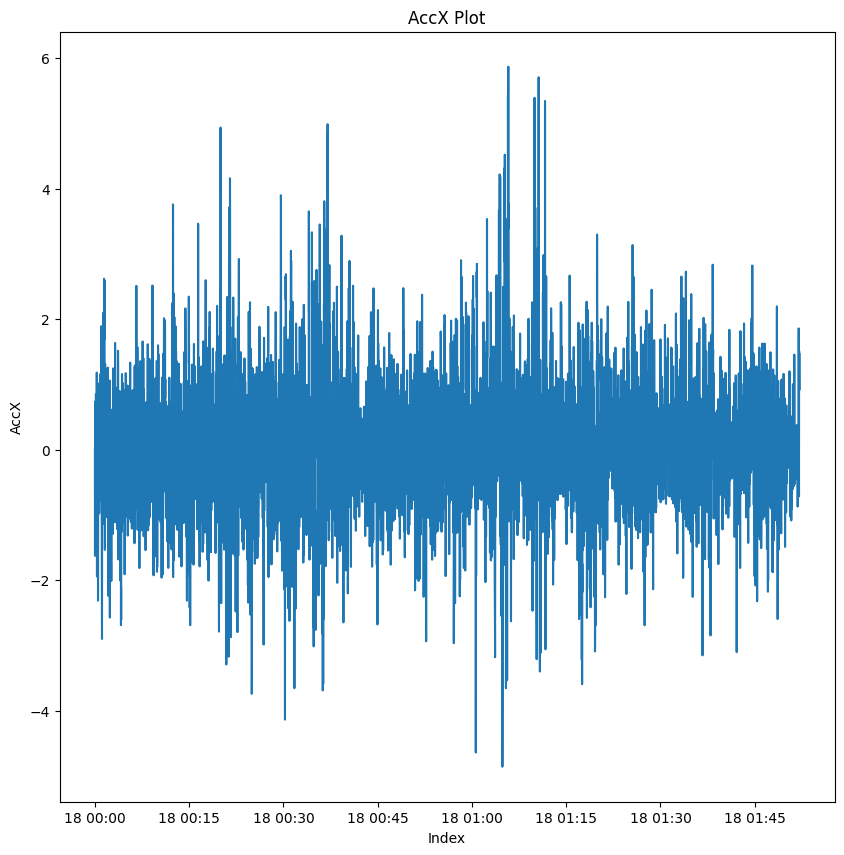

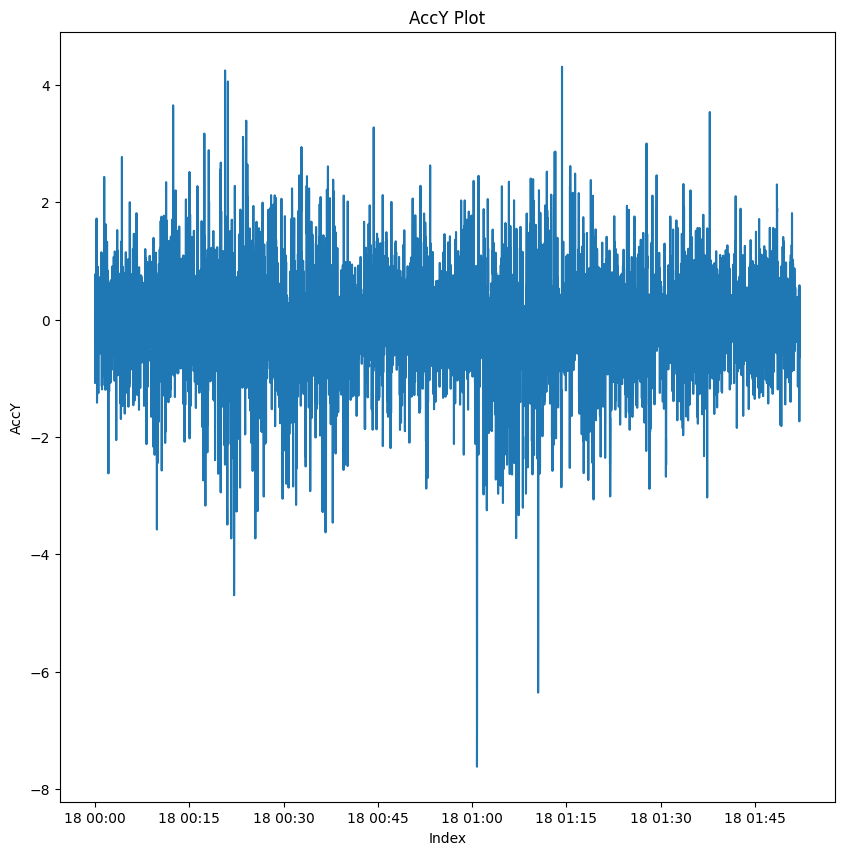

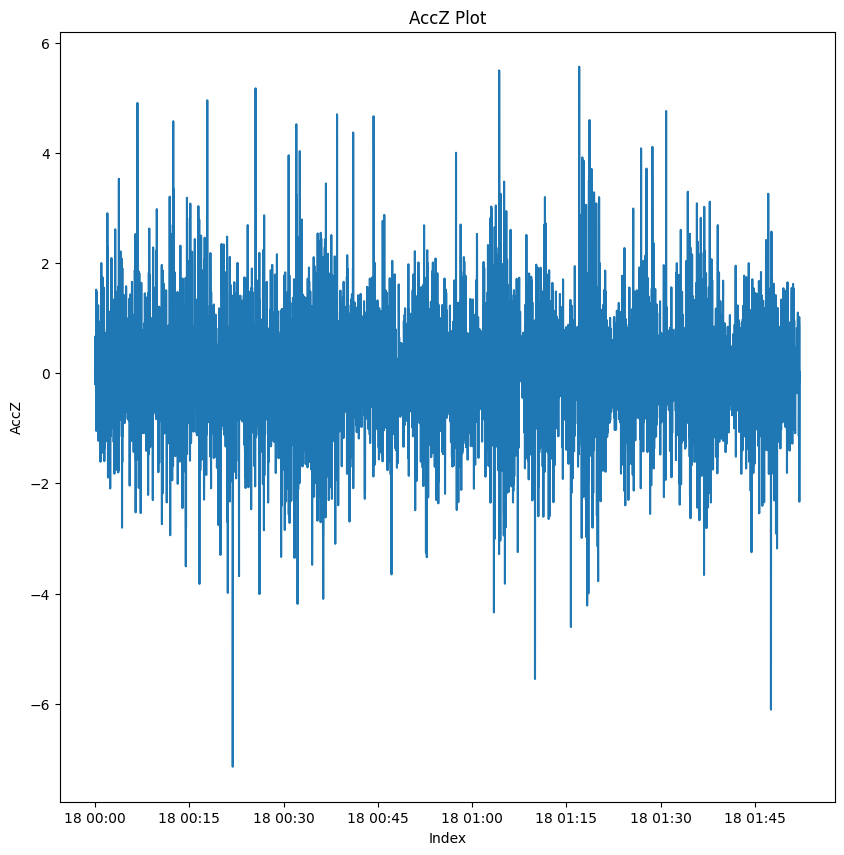

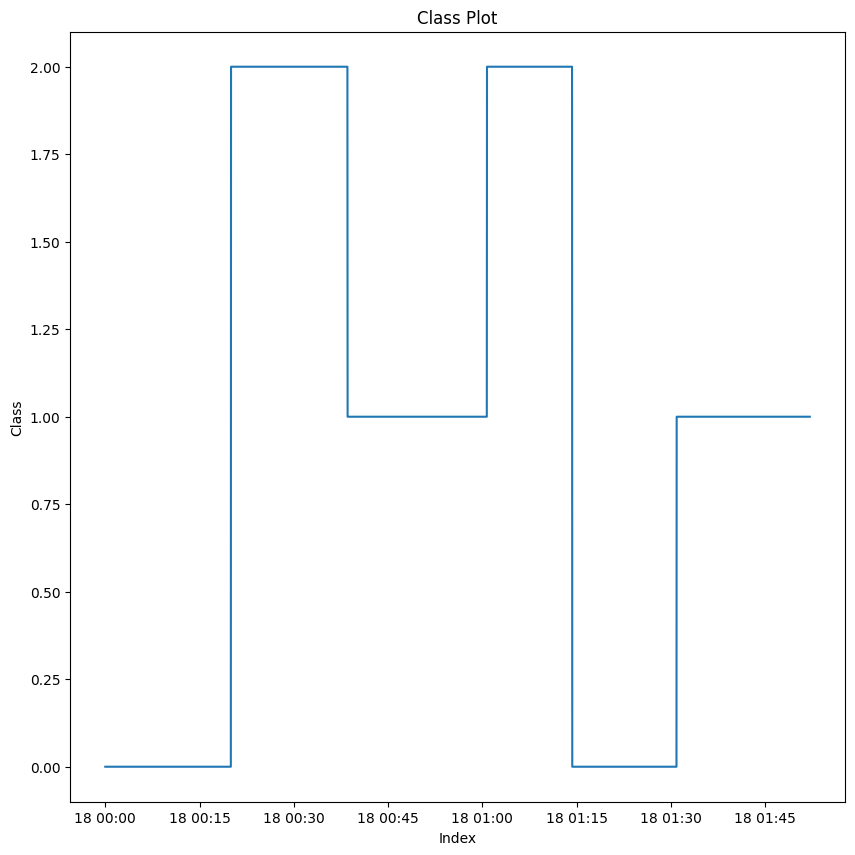

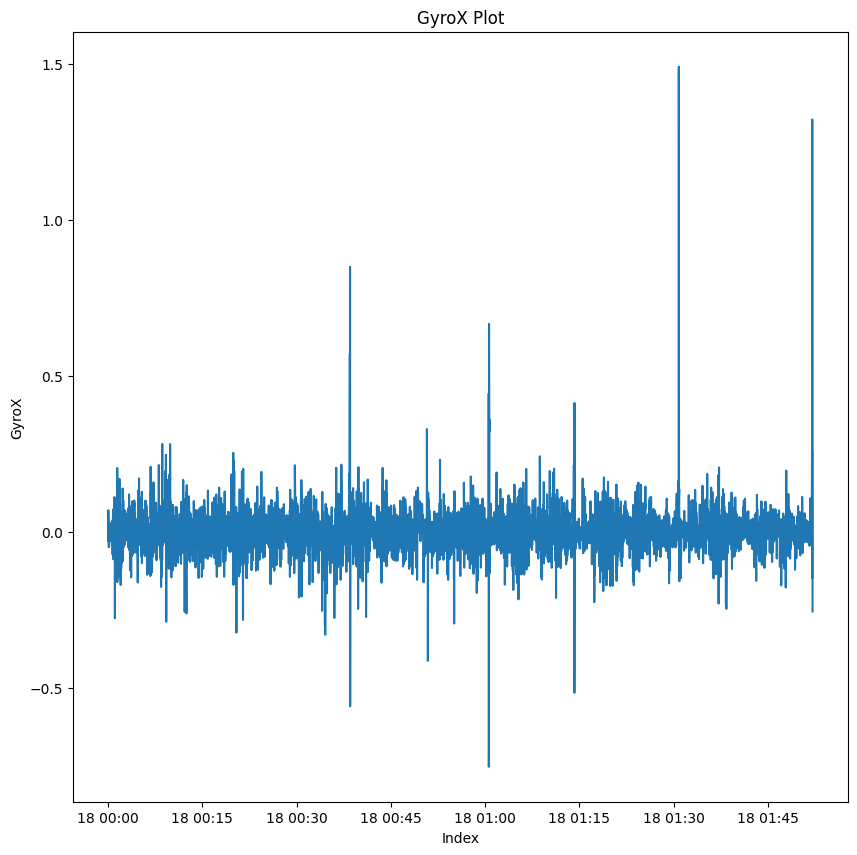

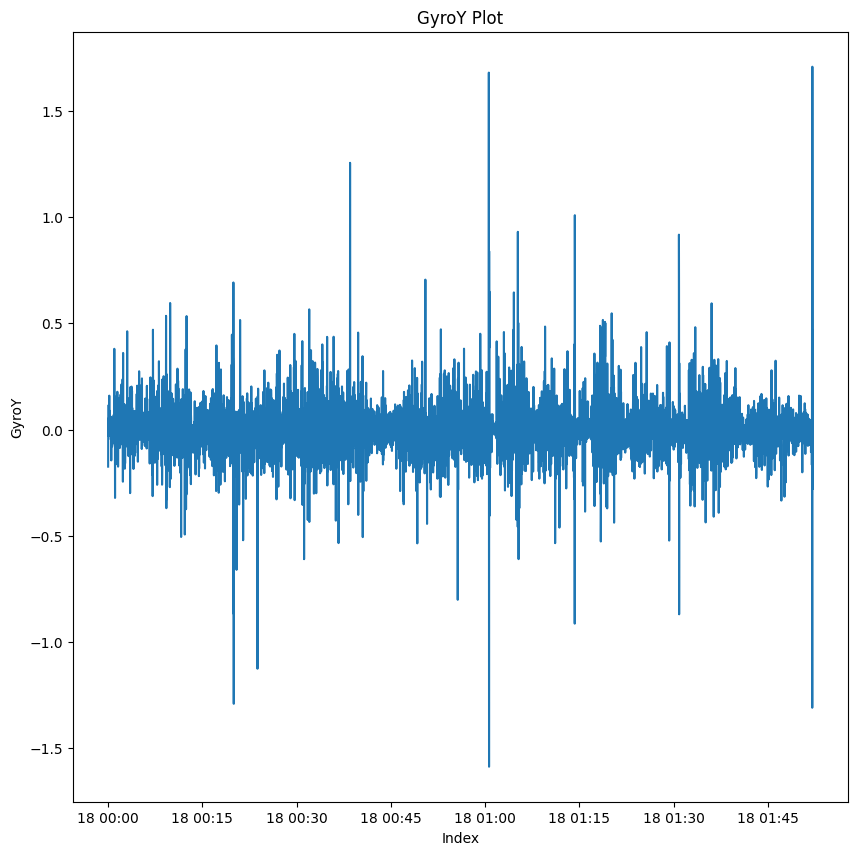

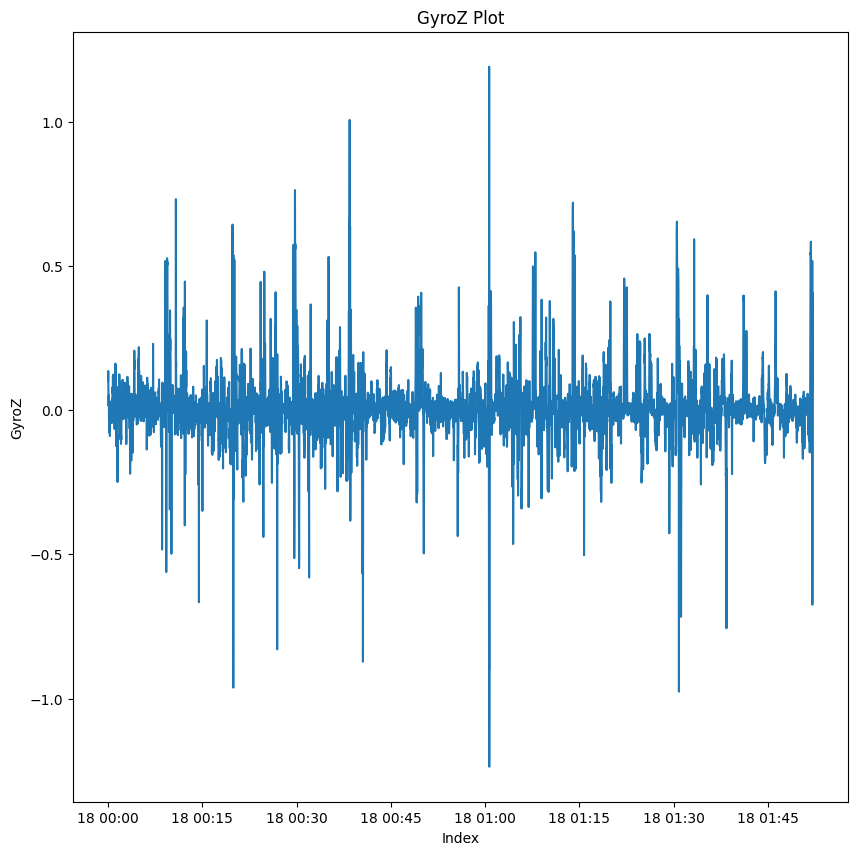

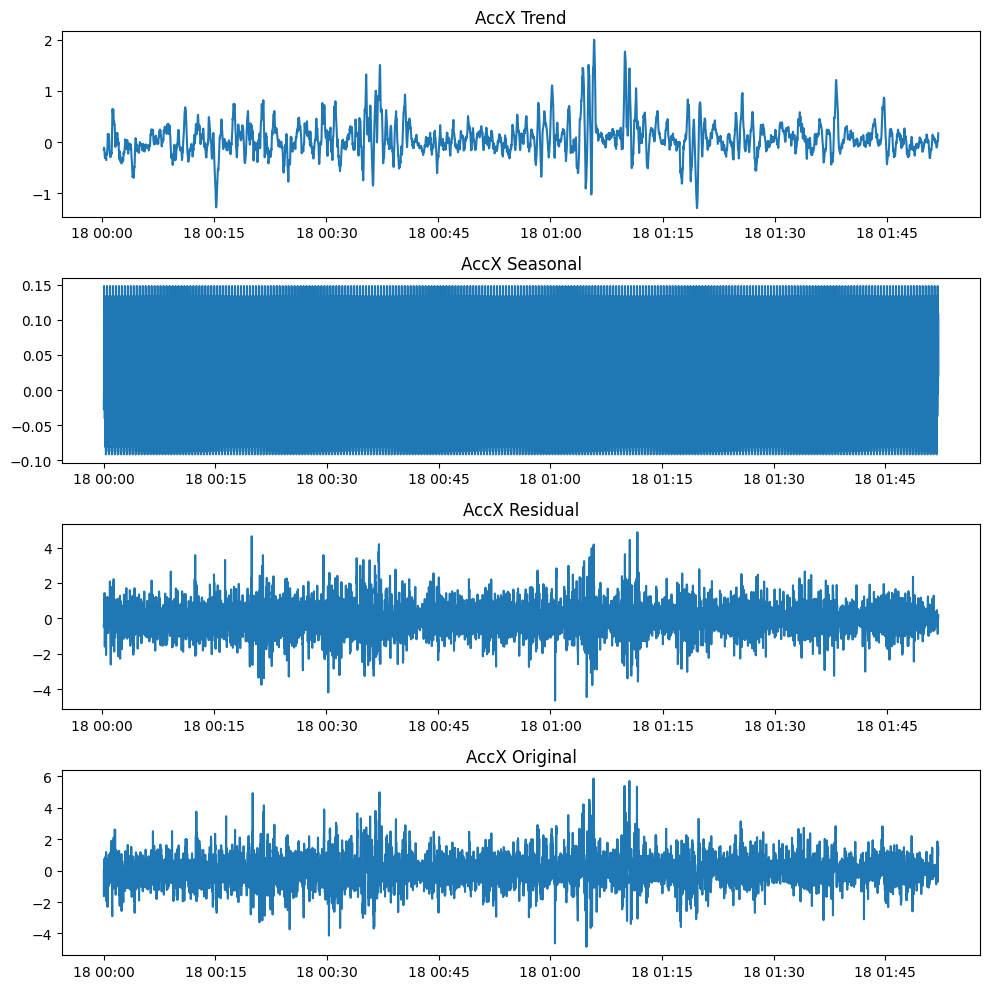

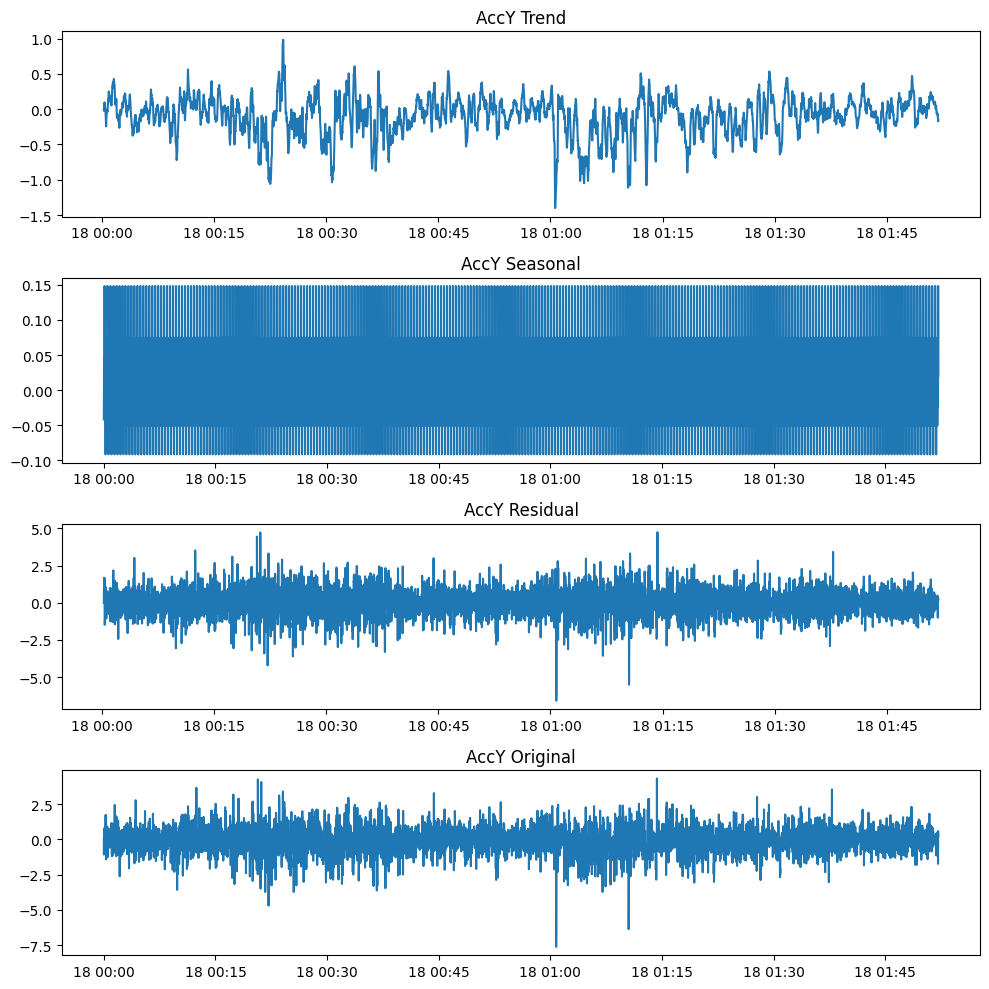

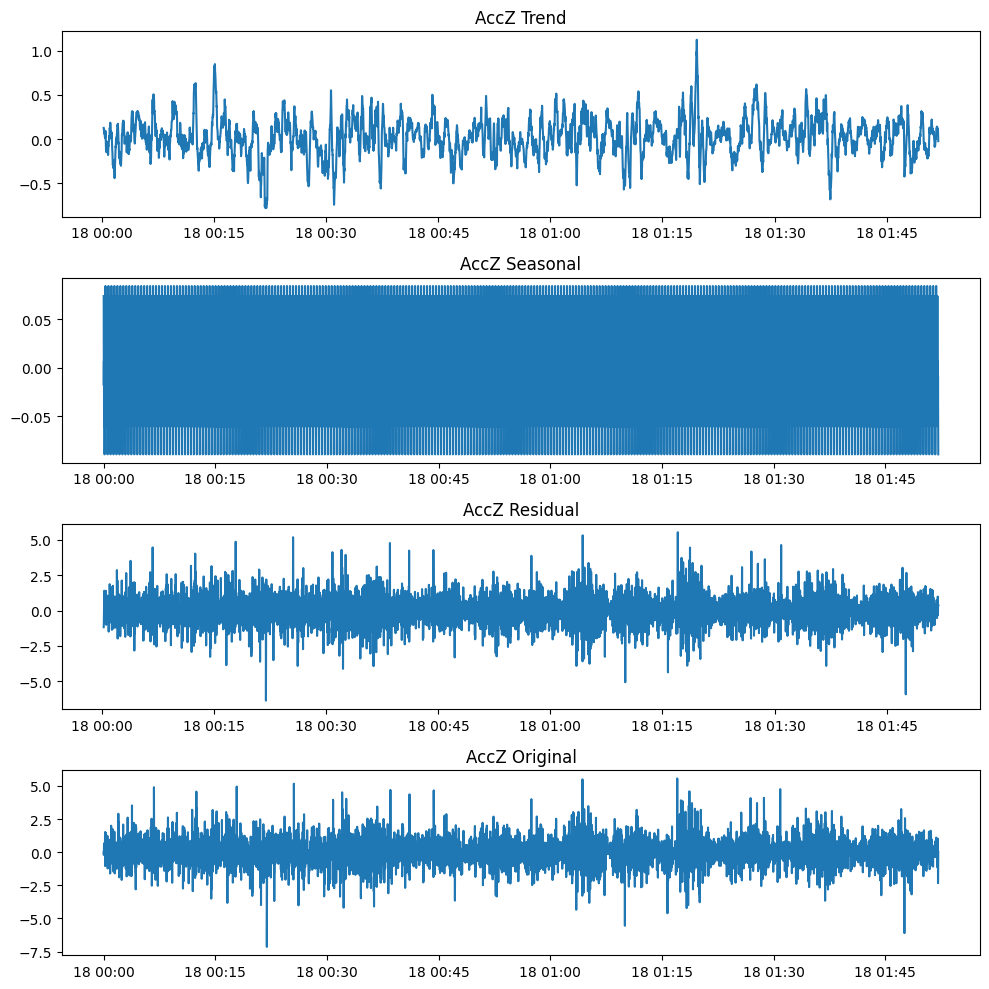

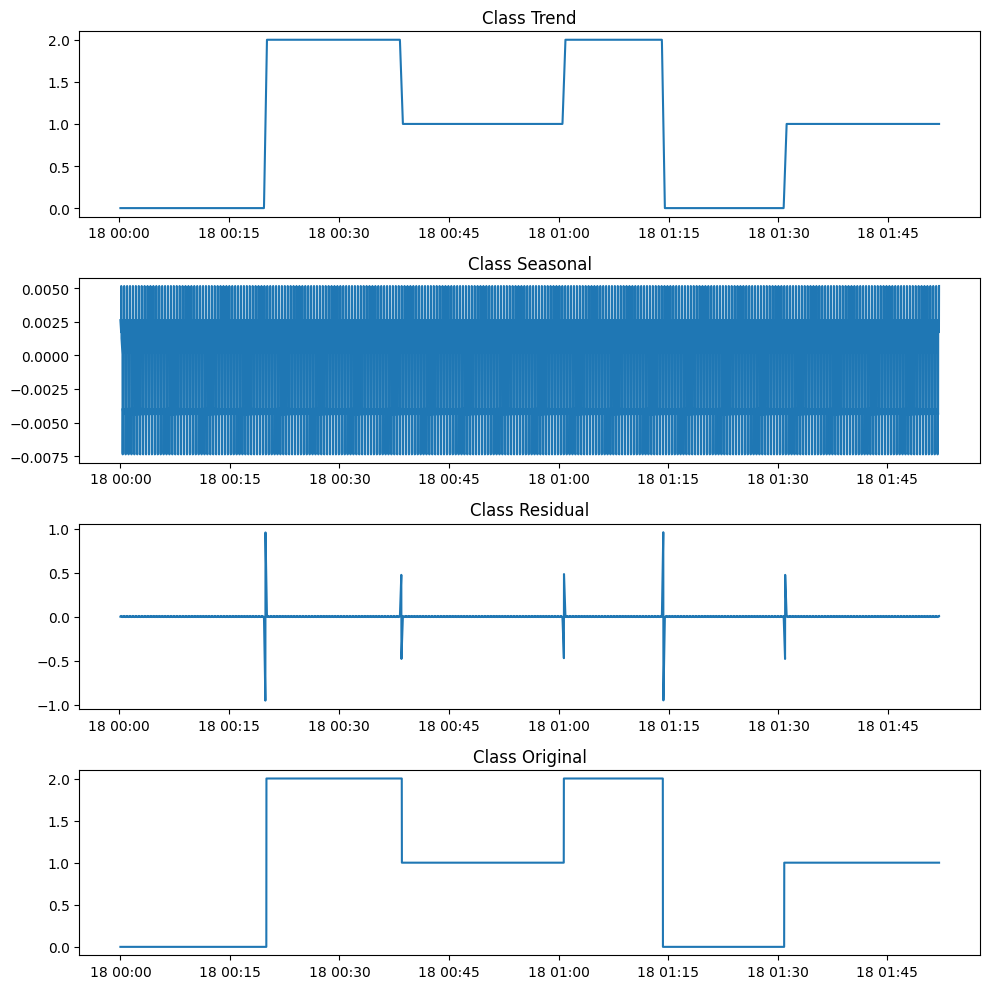

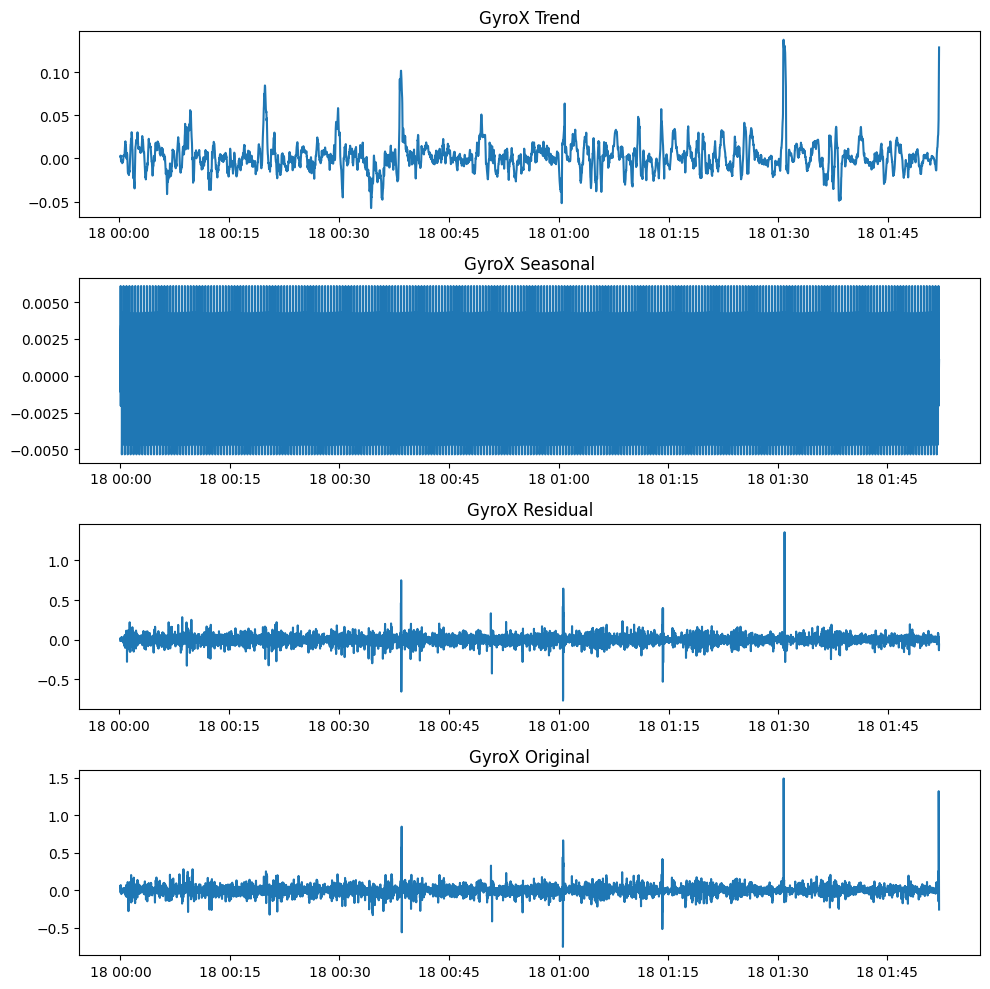

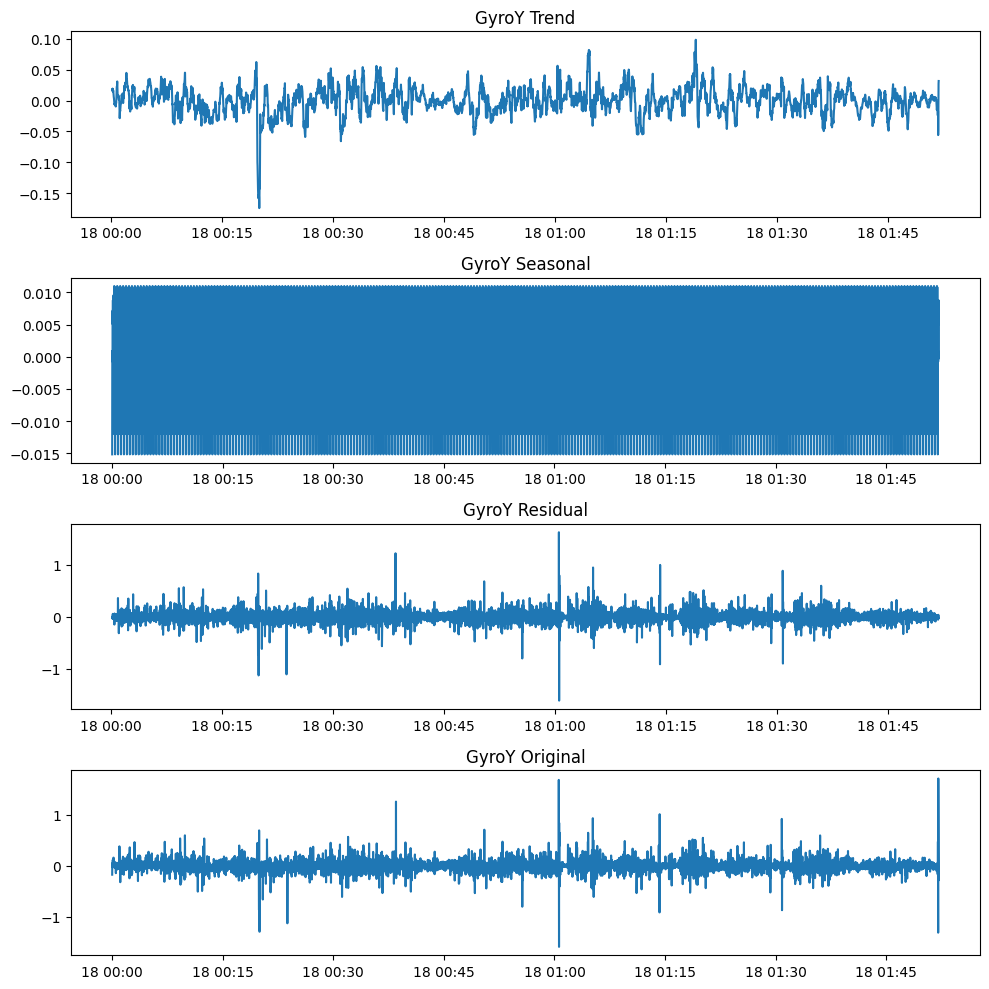

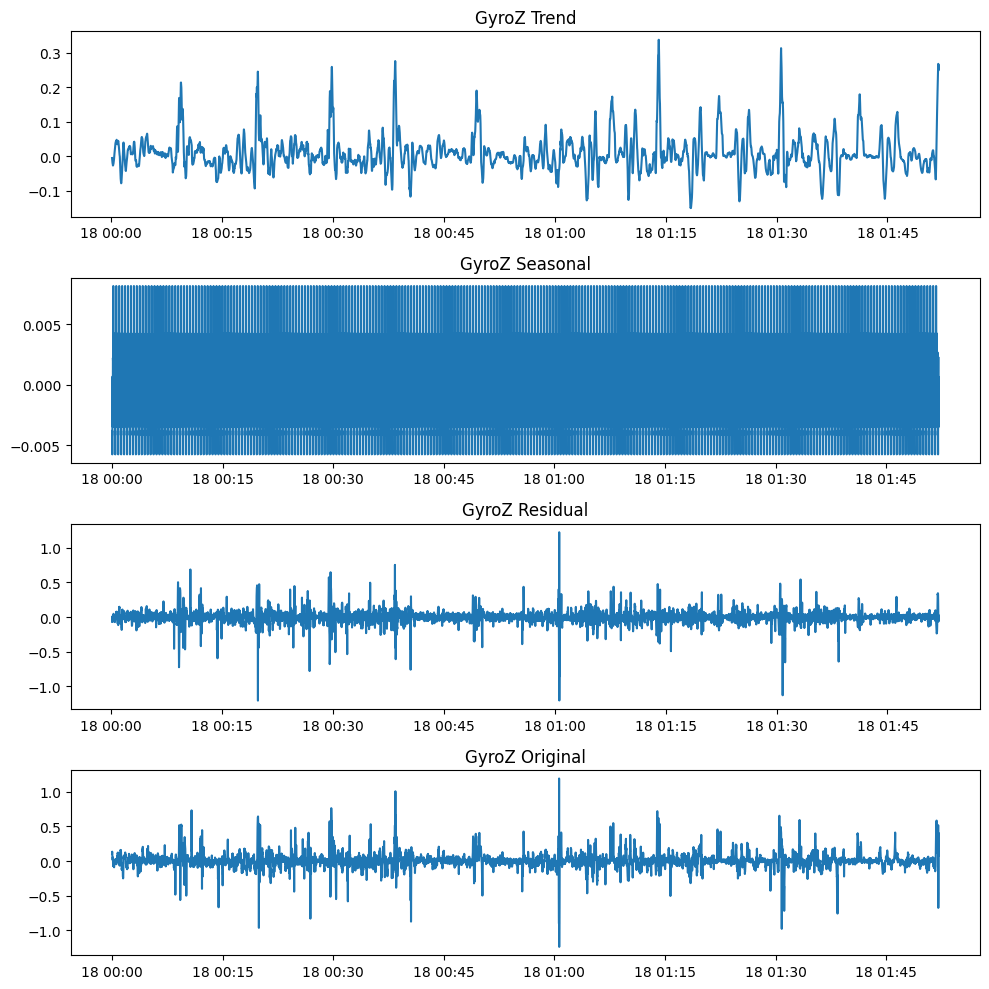

Save Finish


In [7]:
# Adjust period based on data for Decomposition
period = 24
# Plot width 
x_size = 10
# Plot height
y_size = 10
# Set option
# 1.HeatMap, 2.plot, 3.Decomposition, 4.All 
option = 4

# Set Start Function
Visualize_EDA(df, period, x_size, y_size, option)

## Check Statistical_Test

In [8]:
# Check ADF Test
adf_test(df)


adf_test for column: AccX
ADF Statistic: -20.272672010474245
p-value: 0.0
Critical Values: {'1%': -3.4313255151950286, '5%': -2.8619710963711977, '10%': -2.5669994689648994}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: AccY
ADF Statistic: -29.130171081136528
p-value: 0.0
Critical Values: {'1%': -3.431323337197362, '5%': -2.8619701340354373, '10%': -2.5669989566945035}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: AccZ
ADF Statistic: -56.357855635981
p-value: 0.0
Critical Values: {'1%': -3.4313226133577492, '5%': -2.861969814210905, '10%': -2.566998786445594}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: Class
ADF Statistic: -2.29864343844678


In [9]:
# Check KPSS Test
kpss_test(df)


kpss_test for column: AccX
KPSS Statistic: 0.41972404609402836
p-value: 0.06865342840774641
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: AccY
KPSS Statistic: 0.3443043843748781
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: AccZ
KPSS Statistic: 0.142957576476422
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: Class
KPSS Statistic: 1.0832600002895352
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0

In [10]:
# Check PP Test
pp_test(df)


pp_test for column: AccX

Phillips-Perron Test for column: AccX
Test Statistic: -53.906223908105815
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: AccY

Phillips-Perron Test for column: AccY
Test Statistic: -63.069820797608635
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: AccZ

Phillips-Perron Test for column: AccZ
Test Statistic: -81.08993071127195
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: Class

Phillips-Perron Test for column: Class
Test Statistic: -2.320172334246618
p-value: 0.1655445028467284
The series is not stationary
--------------------------------------------------------------------------------

In [11]:
# Check ljung box Test
ljung_box_test(df, lags=10)


Ljung-Box Test for column: AccX
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: AccY
p-value: 3.4197931852418735e-210
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: AccZ
p-value: 0.4609925730226394
No autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: Class
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: GyroX
p-value: 2.1632259358930606e-58
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for 

In [12]:
# Check Arch Test
arch_test(df)


arch_test for column: AccX
ARCH Model Results:

Omega (Intercept): 5.92e-01
Alpha[1] (ARCH Term): 0.3604

Model Evaluation:
Log-Likelihood: -8891.09
AIC (Akaike Information Criterion): 17788.17
BIC (Bayesian Information Criterion): 17808.61

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is low, suggesting that past variances have a weaker effect on current volatility.
------------------------------------------------------------------------------------------------------------------

arch_test for column: AccY
ARCH Model Results:

Omega (Intercept): 5.78e-01
Alpha[1] (ARCH Term): 0.2807

Model Evaluation:
Log-Likelihood: -8560.09
AIC (Akaike Information Criterion): 17126.18
BIC (Bayesian Information Criterion): 17146.62

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is low, suggesting that past variances have a weaker effect on current volatility.
-----------------------------------------

In [13]:
# Check VIF Test
vif_test(df)

Variable: const, VIF: 2.52, Interpretation: Low multicollinearity
Variable: AccX, VIF: 1.15, Interpretation: Low multicollinearity
Variable: AccY, VIF: 1.04, Interpretation: Low multicollinearity
Variable: AccZ, VIF: 1.01, Interpretation: Low multicollinearity
Variable: Class, VIF: 1.01, Interpretation: Low multicollinearity
Variable: GyroX, VIF: 1.12, Interpretation: Low multicollinearity
Variable: GyroY, VIF: 1.09, Interpretation: Low multicollinearity
Variable: GyroZ, VIF: 1.15, Interpretation: Low multicollinearity
